# COMP9417 Group Project--Text Classification
---

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import imblearn

## 0. Task
1. Problem description
    1. [x] 9000 train + 500 validating + 500 testing
    - [x] 10 Classes + "IRRELEVANT"
        1. How do we deal with "IRRELEVANT" in test set? Can we remove it and predict only 10 classes?
    - [x] At least 2 classifiers
    - [x] At most 10 suggestions above a threshold
        1. Threshold may be relative to proportion of "IRRELEVANT" entries in test set        


2. Exploratory Data Analysis
    
    1. [x] Data visualization
        1. [x] Very unbalanced over classes -- Histogram
        - [x] Some articles might have way larger vocabulary -- Box plots


3. Feature Engineering
    1. [x] Text representation
        1. Word Count Vectors
        - [x] TF-IDF Vectors -- balance word frequency and document size


4. Label encoding
    1. [x] Classes --> \[0, 9\]
    
 
5. Train/validation splitting


6. GridSearchCV
    1. [x] Models: **each with own parameters**
        1. [x] Multinomial Naive Bayes
        - [x] SVM
        - KNN
        - [x] Decision Tree / Random forest
        - Grdient Boosting <p>...</p>
    2. [x] Metrics
        1. [x] Use accuracy for parameter tuning since False positive and False negative should be equally bad...
        2. [x] Include others in report too
        3. [x] Draw confusion matrix to visually illustrate
        
7. Predictions
    1. [x] Model interpretation
        1. [x] Need to explain misclassifications?
    2. [x] Dimentionality reduction
        1. [x] PCA
        2. [x] t-SEN
    3. [x] **Predicted Conditional Probabilities**
        1. Set a threshold, suggest only those with a Conditional Probability above (at most 10)
        - How to set a proper threshold? Has anything to do with "IRRELEVANT"?

## 1. Data Visulization
Check the distribution of data over classes.

In [4]:
df = pd.read_csv("training.csv")#.set_index("article_number")
df.head()
df.info()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 3 columns):
article_number    9500 non-null int64
article_words     9500 non-null object
topic             9500 non-null object
dtypes: int64(1), object(2)
memory usage: 222.8+ KB


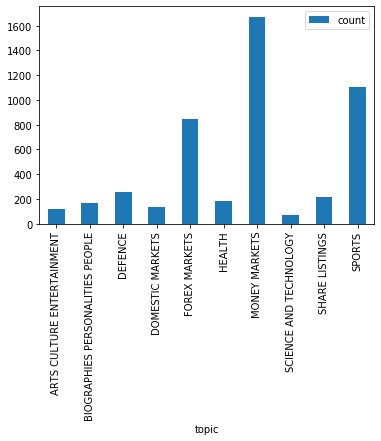

In [53]:
data = df[df.topic != "IRRELEVANT"].reset_index(drop=True)
distribution = data.groupby("topic").article_words.count().plot(kind="bar", label="count", legend="best")

## 2. 